In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import pickle
import PIL
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

In [2]:
path ='../Data'
save_path = '../Preprocessed_Data'

In [3]:
def load_data(file_name):
    with open(os.path.join(save_path,file_name),'rb') as f:
        data = pickle.load(f)
    return data

In [4]:
# load the data
# train_images = load_data('resized_train_images.pickle')

In [5]:
with open("../Data/train.jsonl") as f:
    train_lines = f.readlines()

data_train = [eval(c) for c in train_lines]
df_train = pd.DataFrame(data_train)

with open("../Data/dev_seen.jsonl") as f:
    dev_seen_lines = f.readlines()

data_dev_seen = [eval(c) for c in dev_seen_lines]
df_dev_seen = pd.DataFrame(data_dev_seen)

with open("../Data/test_seen.jsonl") as f:
    test_seen_lines = f.readlines()

data_test_seen = [eval(c) for c in test_seen_lines]
df_test_seen = pd.DataFrame(data_test_seen)

In [6]:
df_train, _ = train_test_split(df_train, test_size=0.7, random_state=42, stratify=df_train['label'])

In [7]:
def load_images(df):
    images = []
    ls_exists = []
    paths = df['img'].to_list()
    for i in tqdm(range(len(paths))):
        if not os.path.exists(path + "/" + paths[i]):
            ls_exists.append(False)
            continue
        ls_exists.append(True)
        img = np.array(PIL.Image.open(path + "/" + paths[i]))
        images.append(img)
    return images, ls_exists

In [8]:
# train_images, train_ls_exists = load_images(df_train)
# dev_seen_images, dev_seen_ls_exists = load_images(df_dev_seen)
test_seen_images, test_seen_ls_exists = load_images(df_test_seen)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:
# df_train['img_exists'] = train_ls_exists
# df_dev_seen['img_exists'] = dev_seen_ls_exists
df_test_seen['img_exists'] = test_seen_ls_exists

# df_train = df_train[df_train['img_exists'] == True]
# df_dev_seen = df_dev_seen[df_dev_seen['img_exists'] == True]
df_test_seen = df_test_seen[df_test_seen['img_exists'] == True]

In [10]:
min_length = float('inf')
min_breadth = float('inf')
max_length = 0
max_breadth = 0
# for i in range(len(train_images)):
#     if train_images[i].shape[0] < min_length:
#         min_length = train_images[i].shape[0]
#     if train_images[i].shape[1] < min_breadth:
#         min_breadth = train_images[i].shape[1]
#     if train_images[i].shape[0] > max_length:
#         max_length = train_images[i].shape[0]
#     if train_images[i].shape[1] > max_breadth:
#         max_breadth = train_images[i].shape[1]
# for i in range(len(dev_seen_images)):
#     if dev_seen_images[i].shape[0] < min_length:
#         min_length = dev_seen_images[i].shape[0]
#     if dev_seen_images[i].shape[1] < min_breadth:
#         min_breadth = dev_seen_images[i].shape[1]
#     if dev_seen_images[i].shape[0] > max_length:
#         max_length = dev_seen_images[i].shape[0]
#     if dev_seen_images[i].shape[1] > max_breadth:
#         max_breadth = dev_seen_images[i].shape[1]
for i in range(len(test_seen_images)):
    if test_seen_images[i].shape[0] < min_length:
        min_length = test_seen_images[i].shape[0]
    if test_seen_images[i].shape[1] < min_breadth:
        min_breadth = test_seen_images[i].shape[1]
    if test_seen_images[i].shape[0] > max_length:
        max_length = test_seen_images[i].shape[0]
    if test_seen_images[i].shape[1] > max_breadth:
        max_breadth = test_seen_images[i].shape[1]
print(min_length, min_breadth, max_length, max_breadth)

287 133 800 825


In [11]:
all_lengths = []
all_breadths = []
# for i in range(len(train_images)):
#     all_lengths.append(train_images[i].shape[0])
#     all_breadths.append(train_images[i].shape[1])
mean_length = 528
mean_breadth = 600
print(mean_length, mean_breadth)

528 600


In [12]:
def resize_images(images, length, breadth):
    resized_images = []
    for i in range(len(images)):
        image_length = images[i].shape[0]
        image_breadth = images[i].shape[1]
        image_new = images[i]
        if image_length > length:
            image_new = image_new[:length, :, :]
        elif image_length < length:
            # repeat the image horizontally
            extra = length - image_length
            if extra < image_length:
                chunk = image_new[image_length - extra:, :, :]
            else:
                number_of_full_chunks = int(extra / image_length)
                remainder = extra % image_length
                chunk = image_new
                for j in range(number_of_full_chunks-1):
                    chunk = np.concatenate((chunk, image_new), axis=0)
                if remainder > 0:
                    chunk = np.concatenate((chunk, image_new[:remainder, :, :]), axis=0)
            image_new = np.concatenate((image_new, chunk), axis=0)
        if image_breadth > breadth:
            image_new = image_new[:, :breadth, :]
        elif image_breadth < breadth:
            # repeat the image vertically
            extra = breadth - image_breadth
            if extra < image_breadth:
                chunk = image_new[:, image_breadth - extra:, :]
            else:
                number_of_full_chunks = int(extra / image_breadth)
                remainder = extra % image_breadth
                chunk = image_new
                for j in range(number_of_full_chunks-1):
                    chunk = np.concatenate((chunk, image_new), axis=1)
                if remainder > 0:
                    chunk = np.concatenate((chunk, image_new[:, :remainder, :]), axis=1)
            image_new = np.concatenate((image_new, chunk), axis=1)
        resized_images.append(image_new)
    return resized_images

In [13]:
# resized_train_images = resize_images(train_images, mean_length, mean_breadth)
# resized_dev_seen_images = resize_images(dev_seen_images, mean_length, mean_breadth)
resized_test_seen_images = resize_images(test_seen_images, mean_length, mean_breadth)

(400, 283, 3) (528, 600, 3)


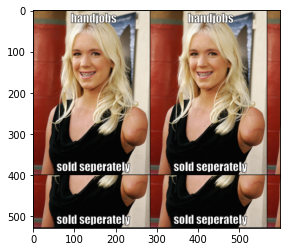

In [14]:
# find image smaller than mean_length and mean_breadth
# for i in range(len(train_images)):
#     if train_images[i].shape[0] < mean_length or train_images[i].shape[1] < mean_breadth:
#         print(train_images[i].shape)
#         # plt.imshow(train_images[i])
#         plt.imshow(resized_train_images[i])
#         break

# for i in range(len(dev_seen_images)):
#     if dev_seen_images[i].shape[0] < mean_length or dev_seen_images[i].shape[1] < mean_breadth:
#         print(dev_seen_images[i].shape, resized_dev_seen_images[i].shape)
#         # plt.imshow(dev_seen_images[i])
#         plt.imshow(resized_dev_seen_images[i])
#         break

for i in range(len(test_seen_images)):
    if test_seen_images[i].shape[0] < mean_length or test_seen_images[i].shape[1] < mean_breadth:
        print(test_seen_images[i].shape, resized_test_seen_images[i].shape)
        # plt.imshow(test_seen_images[i])
        plt.imshow(resized_test_seen_images[i])
        break


In [15]:
# normalize the images
def normalize_images(image):
    return image / 255

In [16]:
# for i in range(len(resized_train_images)):
#     resized_train_images[i] = normalize_images(resized_train_images[i])
# for i in range(len(resized_dev_seen_images)):
#     resized_dev_seen_images[i] = normalize_images(resized_dev_seen_images[i])
for i in range(len(resized_test_seen_images)):
    resized_test_seen_images[i] = normalize_images(resized_test_seen_images[i])

In [17]:
# with open(save_path + "/resized_train_images.pickle", "wb") as f:
#   pickle.dump(resized_train_images, f)

# with open(save_path + "/resized_dev_seen_images.pickle", "wb") as f:
#   pickle.dump(resized_dev_seen_images, f)

with open(save_path + "/resized_test_seen_images.pickle", "wb") as f:
  pickle.dump(resized_test_seen_images, f)

In [18]:
# df_train.to_csv(save_path + "/df_train.csv", index=False)
# df_dev_seen.to_csv(save_path + "/df_dev_seen.csv", index=False)
df_test_seen.to_csv(save_path + "/df_test_seen.csv", index=False)